<a href="https://colab.research.google.com/github/kcaat/Rpackage/blob/main/NLP_Diversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Applying NLP to explore diversity, equity, and inclusion in literature on machine-learning for predicting prediabetes and diabetes

### Literature search process:


Databases
*   Medline - 85 results (MESH terms: Machine Learning, Prediabetic State; Text keywords: artificial intelligence, machine?learn*, pre?diabet*)
*   Embase - 300 results (MESH terms: impaired glucose tolerance, machine learning; Text keywords: artificial intelligence, machine?learn*, pre?diabet*)

De-duplication
*   Covidence and manual
*   80 duplicates

Screening
*   107 eligible
*   198 ineligible

Full-text retrieval
*   Covidence and Zotero
*   79 full-texts found for studies
*   28 full-texts not found

Full-text screening/Title, abstract, discussion extraction
*   67 final eligible, data extracted
*   12 studies excluded (reasons: not a primary study, did not use ML)




### NLP


In [3]:
# Import the pandas library and alias it as 'pd'
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Import the necessary libraries for data cleaning
import re  # Regular expressions library for text manipulation
from datetime import datetime  # Library for handling dates and times

# Read the data from a CSV file into a DataFrame
df = pd.read_excel("NLP extractions.xlsx")
#df = pd.read_excel("NLP extractions.xlsx", encoding='ISO-8859-1')

# Display the first few rows (head) of the DataFrame to inspect the data
df.head()

,Title,Abstract,Discussion,Merged
0,Dysbiosis signatures of gut microbiota and the...,Introduction: The gut microbiota (GM) dysbiosi...,GM has been an emerging factor in the pathogen...,Dysbiosis signatures of gut microbiota and the...
1,Microbiome Features Differentiating Unsupervis...,The alteration of gut microbiota structure pla...,In the current population-based cross-sectiona...,Microbiome Features Differentiating Unsupervis...
2,Breath biomarkers of insulin resistance in pre...,Insulin resistance (IR) affects a quarter of t...,Our study shows the feasibility of collecting ...,Breath biomarkers of insulin resistance in pre...
3,Development and Validation of a Deep Learning ...,BACKGROUND: Previously developed prediction mo...,Effective screening of high-risk subjects in t...,Development and Validation of a Deep Learning ...
4,Prediction of progression from pre-diabetes to...,"AIMS: Identification, a priori, of those at hi...",We hereby describe the training of a machine l...,Prediction of progression from pre-diabetes to...


Handling contractions

In [5]:
#!pip install contractions
import contractions

# Expand contractions in the 'Merged' column
df['expanded'] = df['Merged'].apply(lambda x: contractions.fix(x))
df[['expanded']].head()

,expanded
0,Dysbiosis signatures of gut microbiota and the...
1,Microbiome Features Differentiating Unsupervis...
2,Breath biomarkers of insulin resistance in pre...
3,Development and Validation of a Deep Learning ...
4,Prediction of progression from pre-diabetes to...


Data standardization

In [6]:
# Tasks:
# - Lowercasing
# - Removing special characters and numbers

# Function to remove special characters and numbers
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z\s]', '', text)

# Perform the data cleaning
df['expanded'] = df['expanded'].str.lower()
df['expanded'] = df['expanded'].apply(remove_special_characters)

df.head()

,Title,Abstract,Discussion,Merged,expanded
0,Dysbiosis signatures of gut microbiota and the...,Introduction: The gut microbiota (GM) dysbiosi...,GM has been an emerging factor in the pathogen...,Dysbiosis signatures of gut microbiota and the...,dysbiosis signatures of gut microbiota and the...
1,Microbiome Features Differentiating Unsupervis...,The alteration of gut microbiota structure pla...,In the current population-based cross-sectiona...,Microbiome Features Differentiating Unsupervis...,microbiome features differentiating unsupervis...
2,Breath biomarkers of insulin resistance in pre...,Insulin resistance (IR) affects a quarter of t...,Our study shows the feasibility of collecting ...,Breath biomarkers of insulin resistance in pre...,breath biomarkers of insulin resistance in pre...
3,Development and Validation of a Deep Learning ...,BACKGROUND: Previously developed prediction mo...,Effective screening of high-risk subjects in t...,Development and Validation of a Deep Learning ...,development and validation of a deep learning ...
4,Prediction of progression from pre-diabetes to...,"AIMS: Identification, a priori, of those at hi...",We hereby describe the training of a machine l...,Prediction of progression from pre-diabetes to...,prediction of progression from prediabetes to ...


Tokenization

In [7]:
!pip install nltk
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

#create function from nltk
def tokenize_text(text):
   return word_tokenize(text)

#apply to dataset
df['tokens'] = df['expanded'].apply(tokenize_text)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Title,Abstract,Discussion,Merged,expanded,tokens
0,Dysbiosis signatures of gut microbiota and the...,Introduction: The gut microbiota (GM) dysbiosi...,GM has been an emerging factor in the pathogen...,Dysbiosis signatures of gut microbiota and the...,dysbiosis signatures of gut microbiota and the...,"[dysbiosis, signatures, of, gut, microbiota, a..."
1,Microbiome Features Differentiating Unsupervis...,The alteration of gut microbiota structure pla...,In the current population-based cross-sectiona...,Microbiome Features Differentiating Unsupervis...,microbiome features differentiating unsupervis...,"[microbiome, features, differentiating, unsupe..."
2,Breath biomarkers of insulin resistance in pre...,Insulin resistance (IR) affects a quarter of t...,Our study shows the feasibility of collecting ...,Breath biomarkers of insulin resistance in pre...,breath biomarkers of insulin resistance in pre...,"[breath, biomarkers, of, insulin, resistance, ..."
3,Development and Validation of a Deep Learning ...,BACKGROUND: Previously developed prediction mo...,Effective screening of high-risk subjects in t...,Development and Validation of a Deep Learning ...,development and validation of a deep learning ...,"[development, and, validation, of, a, deep, le..."
4,Prediction of progression from pre-diabetes to...,"AIMS: Identification, a priori, of those at hi...",We hereby describe the training of a machine l...,Prediction of progression from pre-diabetes to...,prediction of progression from prediabetes to ...,"[prediction, of, progression, from, prediabete..."


Lemmatization

*   performed before removing stop words, so that all roots of unwanted words can be removed

In [21]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Function to map NLTK position tags to WordNet tags
def get_wordnet_pos(word, pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens with POS tags
def lemmatize_tokens_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word, tag)) for word, tag in tagged_tokens]

# Apply this function to the 'tokens' column
df['lemmatized'] = df['tokens'].apply(lemmatize_tokens_with_pos)

# view
print(df[['tokens', 'lemmatized']].head())

#print full data for 1 line to see how words are processed
pd.set_option('display.max_colwidth', None)
print(df[['tokens', 'lemmatized']].head(1))
pd.reset_option('all')

                                              tokens  \
0  [dysbiosis, signatures, of, gut, microbiota, a...   
1  [microbiome, features, differentiating, unsupe...   
2  [breath, biomarkers, of, insulin, resistance, ...   
3  [development, and, validation, of, a, deep, le...   
4  [prediction, of, progression, from, prediabete...   

                                          lemmatized  
0  [dysbiosis, signature, of, gut, microbiota, an...  
1  [microbiome, feature, differentiate, unsupervi...  
2  [breath, biomarkers, of, insulin, resistance, ...  
3  [development, and, validation, of, a, deep, le...  
4  [prediction, of, progression, from, prediabete...  
                                                                                                                                                                                                                                                                                                                                             

Remove stop words

In [11]:
# Import the 'stopwords' corpus from the Natural Language Toolkit (NLTK)
from nltk.corpus import stopwords

# Download the set of stopwords from NLTK. This is necessary the first time you run this code.
nltk.download('stopwords')

# Define a function that removes stop words from a list of tokens.
# Stop words are common words that are usually filtered out in NLP tasks.
def remove_stop_words(tokens):
    # Create a set of English stop words. Sets are faster for membership tests than lists.
    stop_words_set = set(stopwords.words('english'))

    # Return a new list that contains only the tokens that are not stop words.
    # The token is also converted to lowercase to ensure case-insensitive matching.
    return [token for token in tokens if token.lower() not in stop_words_set]

# Apply the 'remove_stop_words' function to the 'tokens' column of the dataframe 'df'.
# The result is a new column 'tokens_no_stop' in the dataframe 'df'.
df['no_stop'] = df['lemmatized'].apply(remove_stop_words)

# Display the first few rows of the DataFrame showing the 'tweet', 'tokens', and 'tokens_no_stop' columns.
# This gives a visual comparison between the original tokens and the tokens after stop words removal.
df[['lemmatized', 'no_stop']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,lemmatized,no_stop
0,"[dysbiosis, signature, of, gut, microbiota, an...","[dysbiosis, signature, gut, microbiota, progre..."
1,"[microbiome, feature, differentiate, unsupervi...","[microbiome, feature, differentiate, unsupervi..."
2,"[breath, biomarkers, of, insulin, resistance, ...","[breath, biomarkers, insulin, resistance, pred..."
3,"[development, and, validation, of, a, deep, le...","[development, validation, deep, learning, base..."
4,"[prediction, of, progression, from, prediabete...","[prediction, progression, prediabetes, diabete..."


In [32]:
# Define initial context-sensitive stop words
# We want to filter out common words related to diabetes, ML in order to search for DEI-related words
context_sensitive_stop_words = set(['diabetes', 'mellitus', 'prediabetes', 'insulin',
                                    'machine', 'learning', 'model', 'parameter', 'supervised', 'unsupervised',
                                    'validation', 'testing', 'training', 'prediction', 'classification',
                                    'study', 'introduction', 'objective', 'method', 'result', 'figure', 'discussion', 'conclusion'])

# Define function to remove context-sensitive stop words
def remove_context_sensitive_stop_words(tokens):
    return [token for token in tokens if token.lower() not in context_sensitive_stop_words]

# Apply the function to remove context-sensitive stop words
df['no_stop_context'] = df['no_stop'].apply(remove_context_sensitive_stop_words)

# Display the DataFrame
df[['no_stop', 'no_stop_context']].head()

,no_stop,no_stop_context
0,"[dysbiosis, signature, gut, microbiota, progre...","[dysbiosis, signature, gut, microbiota, progre..."
1,"[microbiome, feature, differentiate, unsupervi...","[microbiome, feature, differentiate, unsupervi..."
2,"[breath, biomarkers, insulin, resistance, pred...","[breath, biomarkers, resistance, prediabetic, ..."
3,"[development, validation, deep, learning, base...","[development, deep, base, system, use, nationw..."
4,"[prediction, progression, prediabetes, diabete...","[progression, development, learn, aim, identif..."


### Create wordcloud

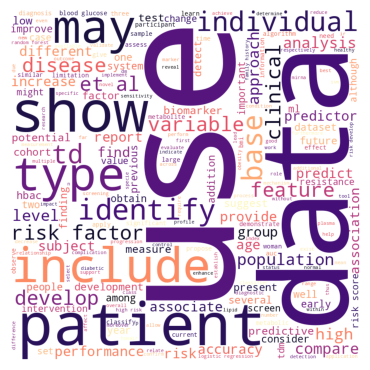

In [33]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df.shape
# Data has 68 rows

# Combine all tokens from the 'tokens_no_stop_context' column into a single list
# Remove .head(68) to generate the word cloud for the entire dataset
all_tokens = sum(df['no_stop_context'].head(68).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # choose a colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Based on initial wordcloud, remove more context-specific stop words


*   first wordcloud was not very informative

In [37]:
# Define context-sensitive stop words: round 2
# words we would expect to see in almost every study
context_sensitive_stop_words2 = set(['use', 'show', 'type', 'patient', 'individual', 'disease', 'clinical', 'data',
                                     'learn', 'aim', 'identify', 'identification',
                                     'develop', 'development', 'variable', 'identify', 'increase', 'measure', 'feature', 'accuracy', 'set', 'performance'
                                     'include', 'may', 'et', 'al', 'suggest', 'find', 'finding',
                                     'risk factor', 'base', 'risk', 'analysis', 'association', 'compare'
                                     ])

# Define function to remove context-sensitive stop words
def remove_context_sensitive_stop_words2(tokens):
    return [token for token in tokens if token.lower() not in context_sensitive_stop_words2]

# Apply the function to remove context-sensitive stop words
df['no_stop_context'] = df['no_stop_context'].apply(remove_context_sensitive_stop_words2)

# Display the DataFrame
df[['no_stop_context']].head()

,no_stop_context
0,"[dysbiosis, signature, gut, microbiota, progre..."
1,"[microbiome, differentiate, unsupervisedstrati..."
2,"[breath, biomarkers, resistance, prediabetic, ..."
3,"[deep, system, nationwide, populationbased, co..."
4,"[progression, priori, high, progression, enabl..."


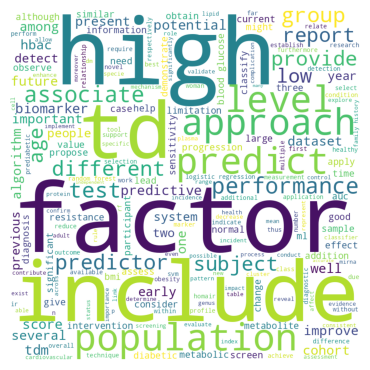

In [38]:
# Wordcloud round 2

# Combine all tokens from the 'tokens_no_stop_context' column into a single list
# Remove .head(68) to generate the word cloud for the entire dataset
all_tokens = sum(df['no_stop_context'].head(68).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='viridis',
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [39]:
# Define context-sensitive stop words: round 3
# words we would expect to see in almost every study
context_sensitive_stop_words3 = set(['high', 'low', 'td', 'factor', 'include',
                                     'predict', 'performance', 'approach', 'report', 'group', 'test', 'subject',
                                     'tdm', 'several', 'biomarker', 'associate', 'dataset', 'sample'
                                     ])

# Define function to remove context-sensitive stop words
def remove_context_sensitive_stop_words3(tokens):
    return [token for token in tokens if token.lower() not in context_sensitive_stop_words3]

# Apply the function to remove context-sensitive stop words
df['no_stop_context'] = df['no_stop_context'].apply(remove_context_sensitive_stop_words3)

# Display the DataFrame
df[['no_stop_context']].head()

,no_stop_context
0,"[dysbiosis, signature, gut, microbiota, progre..."
1,"[microbiome, differentiate, unsupervisedstrati..."
2,"[breath, biomarkers, resistance, prediabetic, ..."
3,"[deep, system, nationwide, populationbased, co..."
4,"[progression, priori, progression, enable, tar..."


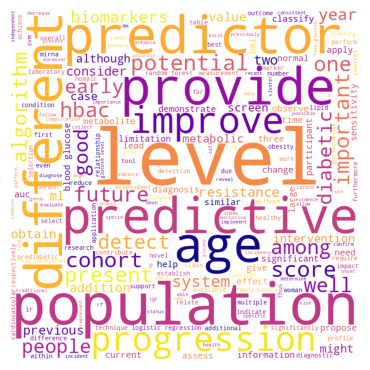

In [45]:
# Wordcloud round 3

# Combine all tokens from the 'tokens_no_stop_context' column into a single list
# Remove .head(68) to generate the word cloud for the entire dataset
all_tokens = sum(df['no_stop_context'].head(68).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='plasma',
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [50]:
# Define context-sensitive stop words: round 4
# words we would expect to see in almost every study
context_sensitive_stop_words4 = set(['level', 'predictor', 'one', 'two', 'hbac', 'important', 'algorithm', 'score', 'diabetic', 'among',
                                     'detect', 'well'
                                     ])

# Define function to remove context-sensitive stop words
def remove_context_sensitive_stop_words4(tokens):
    return [token for token in tokens if token.lower() not in context_sensitive_stop_words4]

# Apply the function to remove context-sensitive stop words
df['no_stop_context'] = df['no_stop_context'].apply(remove_context_sensitive_stop_words4)

# Display the DataFrame
df[['no_stop_context']].head()

,no_stop_context
0,"[dysbiosis, signature, gut, microbiota, progre..."
1,"[microbiome, differentiate, unsupervisedstrati..."
2,"[breath, biomarkers, resistance, prediabetic, ..."
3,"[deep, system, nationwide, populationbased, co..."
4,"[progression, priori, progression, enable, tar..."


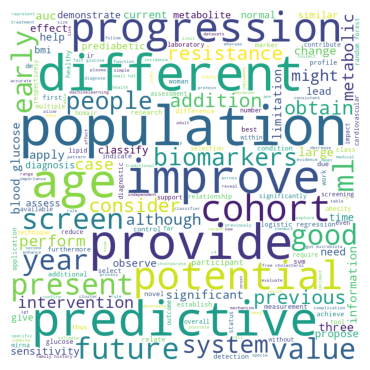

In [52]:
# Wordcloud round 4

# Combine all tokens from the 'tokens_no_stop_context' column into a single list
# Remove .head(68) to generate the word cloud for the entire dataset
all_tokens = sum(df['no_stop_context'].head(68).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='viridis',  # Use viridis
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()